In [1]:
from ann_utils import readInForANN, calculateAccuracy, IO_hist_data, ioHist1, ioHist2, ioNormalizer
import numpy as np
import matplotlib.pyplot as plt
import ann_utils as au
import generateSampledIO as gen
import splitProgramsForTestAndTrain as sp
import importlib

Using TensorFlow backend.


In [2]:
#Load training sets + generate descriptive histograms
z3basic_training_file = 'Progs/SetsForTrainingAndTesting/Training/z3Basic/z3basic_training_25sets.txt'
propagateBounds_training_file = 'Progs/SetsForTrainingAndTesting/Training/propagateBounds/baseline_training_25sets.txt'
exponentialUniform_training_file = 'Progs/SetsForTrainingAndTesting/Training/exponentialUniformSampling/expSampling_training_25sets.txt'
combined_training_file = 'Progs/SetsForTrainingAndTesting/Training/combined/CombinedUniformZ3_training_25sets.txt'
super_test_file = 'Progs/SetsForTrainingAndTesting/Testing/3Progs_superTestSet.txt'

inputs, inputsC, outputs, outputsC = IO_hist_data(z3basic_training_file)
inputs2, inputsC, outputs, outputsC = IO_hist_data(propagateBounds_training_file)
inputs3, inputsC, outputs, outputsC = IO_hist_data(exponentialUniform_training_file)
inputs4, inputsC, outputs, outputsC = IO_hist_data(combined_training_file)

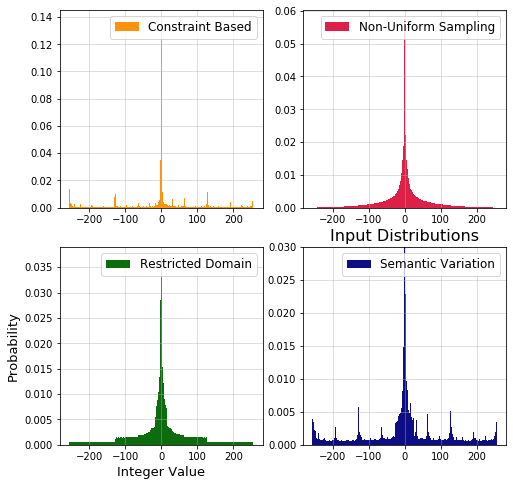

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
axes[0,0].hist((np.array(inputs)+np.random.uniform(-1, 1, size=len(inputs))), 510, density=True, range=[-256, 256], alpha = 0.95, color = 'darkorange', label= 'Constraint Based')
axes[1,0].hist((np.array(inputs2)+np.random.uniform(-1, 1, size=len(inputs2))), 510, density=True, range=[-256, 256], alpha = 0.95, color = 'darkgreen', label = 'Restricted Domain')
axes[0,1].hist((np.array(inputs3)+np.random.uniform(-1, 1, size=len(inputs3))), 510, density=True, range=[-256, 256], alpha = 0.95, color = 'crimson', label = 'Non-Uniform Sampling')
axes[1,1].hist((np.array(inputs4)+np.random.uniform(-1, 1, size=len(inputs4))), 510, density=True, range=[-256, 256], alpha = 0.95, color = 'navy', label='Semantic Variation')
axes[0,0].legend(fontsize = 12)
axes[0,1].legend(fontsize = 12)
axes[1,0].legend(fontsize = 12)
axes[1,1].legend(fontsize = 12)
axes[1,0].set_xlabel('Integer Value', fontsize = 13)
axes[1,0].set_ylabel('Probability',fontsize = 13)

plt.title('Input Distributions', fontsize=16)
plt.ylim((0, 0.03))
axes[0,0].grid(alpha = 0.5)
axes[1,0].grid(alpha = 0.5)
axes[0,1].grid(alpha = 0.5)
axes[1,1].grid(alpha = 0.5)

plt.show()# ioHist2(inputsC,outputsC)

In [4]:
#Load baselines + trained nets
import keras
z3basic_NN = keras.models.load_model('TrainedANNsForPaper/z3basic_NN.h5')
propagateBounds_NN = keras.models.load_model('TrainedANNsForPaper/propagateBounds_NN.h5')
exponentialU_NN = keras.models.load_model('TrainedANNsForPaper/exponential_NN.h5')
combined_NN = keras.models.load_model('TrainedANNsForPaper/combined_NN.h5')

In [5]:
#test sets of interest
z3testSet_file = 'Progs/SetsForTrainingAndTesting/Testing/z3Basic/z3_testing_3sets.txt'
pb_file = 'Progs/SetsForTrainingAndTesting/Testing/propagateBounds/propBounds_minusHardProgs_testing_5sets.txt'
eu_file = 'Progs/SetsForTrainingAndTesting/Testing/exponentialUniformSampling/3Progs_20180926_1pc_examples_expUni.txt'
c_file = 'Progs/SetsForTrainingAndTesting/Testing/combined/Combined_testing_5sets.txt'
super_file = 'Progs/SetsForTrainingAndTesting/Testing/3Progs_superTestSet.txt'

bl2, bl3, bl4 = np.load('Progs/2_3_4Progs_baselines.npy')
bl3 = [x[0] for x in bl3]
# import ann_plots as ap
# import importlib
# importlib.reload(ap)

##Run to make 4 x 4 plot.
f_z3_z3, l_z3_z3, w_z3_z3, bf_z3, bl_z3, bw_z3 = calculateAccuracy(z3testSet_file, z3basic_NN, bl3)
f_ur_z3, l_ur_z3, w_ur_z3, bf_ur, bl_ur, bw_ur = calculateAccuracy(z3testSet_file, propagateBounds_NN, bl3)
f_pb_z3, l_pb_z3, w_pb_z3, bf_pb, bl_pb, bw_pb = calculateAccuracy(z3testSet_file, exponentialU_NN, bl3)
f_eu_z3, l_eu_z3, w_eu_z3, bf_eu, bl_eu, bw_eu = calculateAccuracy(z3testSet_file, combined_NN, bl3)

f_z3_z3, l_z3_z3, w_z3_z32, bf_z3, bl_z3, bw_z32 = calculateAccuracy(pb_file, z3basic_NN, bl3)
f_ur_z3, l_ur_z3, w_ur_z32, bf_ur, bl_ur, bw_ur2 = calculateAccuracy(pb_file, propagateBounds_NN, bl3)
f_pb_z3, l_pb_z3, w_pb_z32, bf_pb, bl_pb, bw_pb2 = calculateAccuracy(pb_file, exponentialU_NN, bl3)
f_eu_z3, l_eu_z3, w_eu_z32, bf_eu, bl_eu, bw_eu2 = calculateAccuracy(pb_file, combined_NN, bl3)

f_z3_z3, l_z3_z3, w_z3_z33, bf_z3, bl_z3, bw_z33 = calculateAccuracy(eu_file, z3basic_NN, bl3)
f_ur_z3, l_ur_z3, w_ur_z33, bf_ur, bl_ur, bw_ur3 = calculateAccuracy(eu_file, propagateBounds_NN, bl3)
f_pb_z3, l_pb_z3, w_pb_z33, bf_pb, bl_pb, bw_pb3 = calculateAccuracy(eu_file, exponentialU_NN, bl3)
f_eu_z3, l_eu_z3, w_eu_z33, bf_eu, bl_eu, bw_eu3 = calculateAccuracy(eu_file, combined_NN, bl3)

f_z3_z3, l_z3_z3, w_z3_z34, bf_z3, bl_z3, bw_z34 = calculateAccuracy(c_file, z3basic_NN, bl3)
f_ur_z3, l_ur_z3, w_ur_z34, bf_ur, bl_ur, bw_ur4 = calculateAccuracy(c_file, propagateBounds_NN, bl3)
f_pb_z3, l_pb_z3, w_pb_z34, bf_pb, bl_pb, bw_pb4 = calculateAccuracy(c_file, exponentialU_NN, bl3)
f_eu_z3, l_eu_z3, w_eu_z34, bf_eu, bl_eu, bw_eu4 = calculateAccuracy(c_file, combined_NN, bl3)

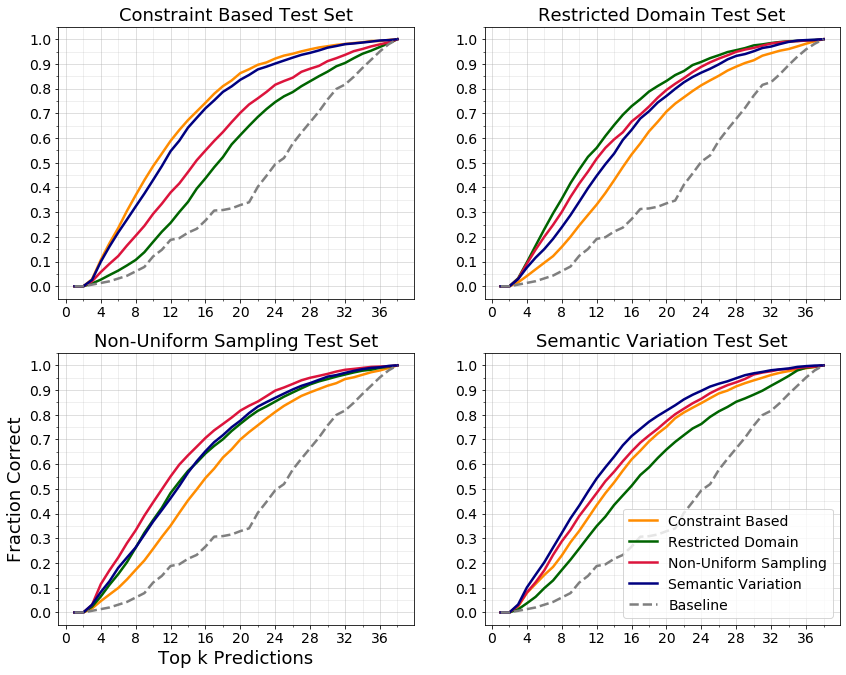

In [6]:
xaxis = np.arange(1,39)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,11))
axes[0,0].plot(xaxis,w_z3_z3, label = 'Constraint Based', color = 'darkorange', linewidth = 2.5)
axes[0,0].plot(xaxis,w_ur_z3, label = 'Restricted Domain', color = 'darkgreen',linewidth = 2.5)
axes[0,0].plot(xaxis,w_pb_z3, label = 'Non-Uniform Sampling', color = 'crimson',linewidth = 2.5)
axes[0,0].plot(xaxis,w_eu_z3, label = 'Semantic Variation', color = 'navy',linewidth = 2.5)
axes[0,0].set_title('Constraint Based Test Set',fontsize =18)
axes[0,0].plot(xaxis,bw_z3,linewidth=2.5, color = 'tab:grey',
        label = 'Baseline', linestyle='--')

axes[0,1].plot(xaxis,w_z3_z32, label = 'Constraint Based', color = 'darkorange', linewidth = 2.5)
axes[0,1].plot(xaxis,w_ur_z32, label = 'Restricted Domain', color = 'darkgreen',linewidth = 2.5)
axes[0,1].plot(xaxis,w_pb_z32, label = 'Non-Uniform Sampling', color = 'crimson',linewidth = 2.5)
axes[0,1].plot(xaxis,w_eu_z32, label = 'Semantic Variation', color = 'navy',linewidth = 2.5)
axes[0,1].set_title('Restricted Domain Test Set',fontsize =18)
axes[0,1].plot(xaxis,bw_z32,linewidth=2.5, color = 'tab:grey',
        label = 'Baseline', linestyle='--')

axes[1,0].plot(xaxis,w_z3_z33, label = 'Constraint Based', color = 'darkorange', linewidth = 2.5)
axes[1,0].plot(xaxis,w_ur_z33, label = 'Restricted Domain', color = 'darkgreen',linewidth = 2.5)
axes[1,0].plot(xaxis,w_pb_z33, label = 'Non-Uniform Sampling', color = 'crimson',linewidth = 2.5)
axes[1,0].plot(xaxis,w_eu_z33, label = 'Semantic Variation', color = 'navy',linewidth = 2.5)
axes[1,0].set_title('Non-Uniform Sampling Test Set',fontsize =18)
axes[1,0].plot(xaxis,bw_z33,linewidth=2.5, color = 'tab:grey',
        label = 'Baseline', linestyle='--')

axes[1,1].plot(xaxis,w_z3_z34, label = 'Constraint Based', color = 'darkorange', linewidth = 2.5)
axes[1,1].plot(xaxis,w_ur_z34, label = 'Restricted Domain', color = 'darkgreen',linewidth = 2.5)
axes[1,1].plot(xaxis,w_pb_z34, label = 'Non-Uniform Sampling', color = 'crimson',linewidth = 2.5)
axes[1,1].plot(xaxis,w_eu_z34, label = 'Semantic Variation', color = 'navy',linewidth = 2.5)
axes[1,1].set_title('Semantic Variation Test Set', fontsize =18)
axes[1,1].plot(xaxis,bw_z34,linewidth=2.5, color = 'tab:grey',
        label = 'Baseline', linestyle='--')

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 39, 4)
minor_ticks = np.arange(0, 39, 2)

major_ticksy = np.arange(0, 1.1, 0.1)
minor_ticksy = np.arange(0, 1.1, 0.05)


axes[0,0].set_xticks(major_ticks)
axes[0,0].set_xticks(minor_ticks, minor=True)
axes[0,0].set_yticks(major_ticksy)
axes[0,0].set_yticks(minor_ticksy, minor=True)
axes[0,0].xaxis.set_tick_params(labelsize=14)
axes[0,0].yaxis.set_tick_params(labelsize=14)

axes[1,0].set_xticks(major_ticks)
axes[1,0].set_xticks(minor_ticks, minor=True)
axes[1,0].set_yticks(major_ticksy)
axes[1,0].set_yticks(minor_ticksy, minor=True)
axes[1,0].xaxis.set_tick_params(labelsize=14)
axes[1,0].yaxis.set_tick_params(labelsize=14)

axes[0,1].set_xticks(major_ticks)
axes[0,1].set_xticks(minor_ticks, minor=True)
axes[0,1].set_yticks(major_ticksy)
axes[0,1].set_yticks(minor_ticksy, minor=True)
axes[0,1].xaxis.set_tick_params(labelsize=14)
axes[0,1].yaxis.set_tick_params(labelsize=14)

axes[1,1].set_xticks(major_ticks)
axes[1,1].set_xticks(minor_ticks, minor=True)
axes[1,1].set_yticks(major_ticksy)
axes[1,1].set_yticks(minor_ticksy, minor=True)
axes[1,1].xaxis.set_tick_params(labelsize=14)
axes[1,1].yaxis.set_tick_params(labelsize=14)
axes[1,1].legend(fontsize = 14)

axes[0,0].grid(which='minor', alpha=0.25)
axes[0,0].grid(which='major', alpha=0.5)
axes[0,1].grid(which='minor', alpha=0.25)
axes[0,1].grid(which='major', alpha=0.5)
axes[1,0].grid(which='minor', alpha=0.25)
axes[1,0].grid(which='major', alpha=0.5)

axes[1,0].set_xlabel('Top k Predictions', fontsize = 18)
axes[1,0].set_ylabel('Fraction Correct',fontsize = 18)
axes[1,1].grid(which='minor', alpha=0.25)
axes[1,1].grid(which='major', alpha=0.5)
plt.show()

In [54]:
##Decimation study
bl2, bl3, bl4 = np.load('Progs/2_3_4Progs_baselines.npy')
bl3 = [x[0] for x in bl3]
import ann_utils as au
import importlib
importlib.reload(au)

eu_file = 'Progs/SetsForTrainingAndTesting/Testing/exponentialUniformSampling/3Progs_20180926_1pc_examples_expUni.txt'

nn1 = keras.models.load_model('ANNs/3Prog_sharedWs_relu_0.799_trainFrac_300000_examples_0.1935_loss.h5')
nn2 = keras.models.load_model('ANNs/3Prog_sharedWs_relu_0.499_trainFrac_300000_examples_0.1825_loss.h5')
nn3 = keras.models.load_model('ANNs/3Prog_sharedWs_relu_0.333_trainFrac_300000_examples_0.1722_loss.h5')
nn4 = keras.models.load_model('ANNs/3Prog_sharedWs_relu_0.199_trainFrac_300000_examples_0.1427_loss.h5')

f_z3_z3, l_z3_z3, w_z3_z3, bf_z3, bl_z3, bw_z3 = au.calculateAccuracy(eu_file, nn1, bl3)
f_ur_z3, l_ur_z3, w_ur_z3, bf_ur, bl_ur, bw_ur = au.calculateAccuracy(eu_file, nn2, bl3)
f_pb_z3, l_pb_z3, w_pb_z3, bf_pb, bl_pb, bw_pb = au.calculateAccuracy(eu_file, nn3, bl3)
f_eu_z3, l_eu_z3, w_eu_z3, bf_eu, bl_eu, bw_eu = au.calculateAccuracy(eu_file, nn4, bl3)
## End Decimation study

Could not find example, skipped
Could not find example, skipped
Could not find example, skipped
Could not find example, skipped
Could not find example, skipped
Could not find example, skipped
Could not find example, skipped
Could not find example, skipped


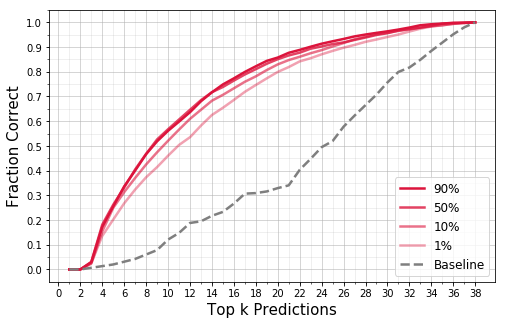

In [64]:
xaxis = np.arange(38)+1
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(xaxis,w_z3_z3, label = '90%', color = 'crimson', linewidth = 2.5, alpha = 1.0)
ax.plot(xaxis,w_ur_z3, label = '50%', color = 'crimson',linewidth = 2.5, alpha = 0.8)
ax.plot(xaxis,w_pb_z3, label = '10%', color = 'crimson',linewidth = 2.5, alpha = 0.6)
ax.plot(xaxis,w_eu_z3, label = '1%', color = 'crimson',linewidth = 2.5, alpha = 0.4)
ax.plot(xaxis,bw_eu,linewidth=2.5, color = 'tab:grey',
        label = 'Baseline', linestyle='--')
# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 39, 2)
minor_ticks = np.arange(0, 39, 1)

major_ticksy = np.arange(0, 1.1, 0.1)
minor_ticksy = np.arange(0, 1.1, 0.05)


ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticksy)
ax.set_yticks(minor_ticksy, minor=True)
ax.grid(which='minor', alpha=0.25)
ax.grid(which='major', alpha=0.5)
ax.set_xlabel('Top k Predictions', fontsize = 15)
ax.set_ylabel('Fraction Correct',fontsize = 15)
ax.set_title('Non-Uniform Sampling Decimation Study', fontsize = 16)
ax.legend(loc = 'lower right', fontsize = 12)
plt.savefig('Paper/figures/reducingTrainingSet_nonuniSampling.png', bbox_inches='tight',dpi=300)
plt.show()

In [9]:
with open('Progs/SetsForTrainingAndTesting/Testing/combined/search_z3_ANN.txt', 'r') as temp:
    z3search = temp.readlines()
with open('Progs/SetsForTrainingAndTesting/Testing/combined/search_ur_ANN.txt', 'r') as temp:
    ursearch = temp.readlines()
with open('Progs/SetsForTrainingAndTesting/Testing/combined/search_pb_ANN.txt', 'r') as temp:
    pbsearch = temp.readlines()
with open('Progs/SetsForTrainingAndTesting/Testing/combined/search_eu_ANN.txt', 'r') as temp:
    exsearch = temp.readlines()
with open('Progs/SetsForTrainingAndTesting/Testing/combined/search_co_ANN.txt', 'r') as temp:
    cosearch = temp.readlines()

z3_times =[]
nnn_times=[]
ur_times=[]
pb_times =[]
ex_times=[]
co_times=[]
test=[]

for x in z3search[::2]: test.append(eval(x.split('|')[4]))

for x in z3search[::2]: nnn_times.append(sum(eval(x.split('|')[4]).values()))
for x in z3search[::2]: z3_times.append(sum(eval(x.split('|')[1]).values()))
for x in ursearch[::2]: ur_times.append(sum(eval(x.split('|')[1]).values()))
for x in pbsearch[::2]: pb_times.append(sum(eval(x.split('|')[1]).values()))
for x in exsearch[::2]: ex_times.append(sum(eval(x.split('|')[1]).values()))
for x in cosearch[::2]: co_times.append(sum(eval(x.split('|')[1]).values()))

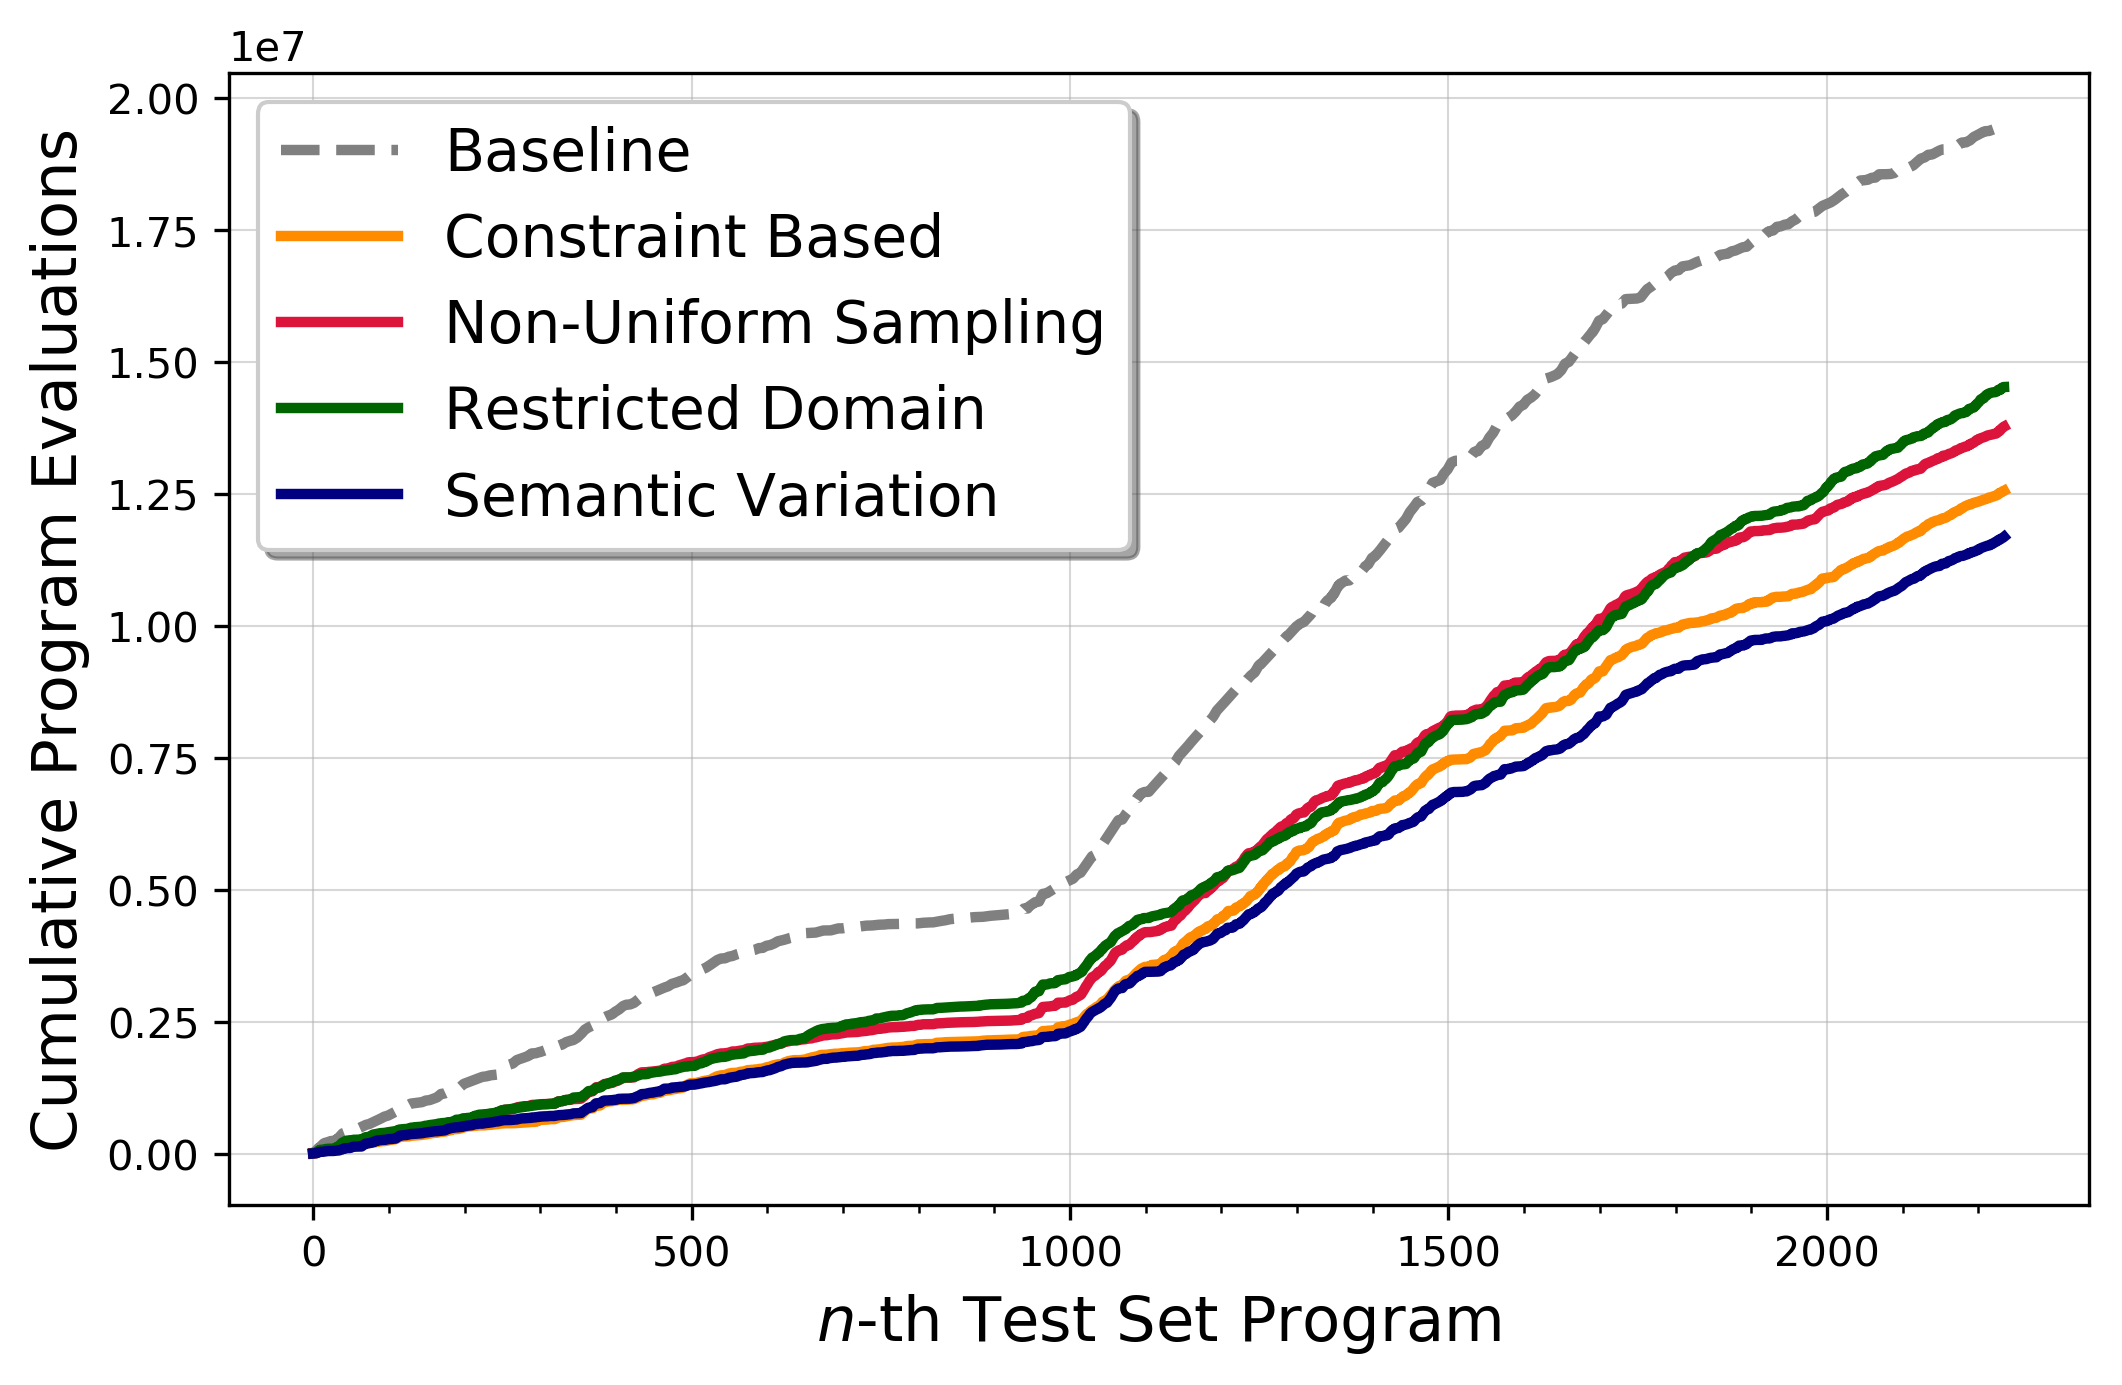

In [52]:
fig, ax = plt.subplots(figsize=(8,5), dpi=300)

ax.plot(np.arange(len(nnn_times)),np.cumsum(nnn_times),linewidth=2.5, color = 'grey', label = 'Baseline', linestyle='--')
ax.plot(np.arange(len(nnn_times)),np.cumsum(z3_times), linewidth=2.5, color = 'darkorange', label = 'Constraint Based')
ax.plot(np.arange(len(nnn_times)),np.cumsum(ex_times),linewidth=2.5, color = 'crimson', label = 'Non-Uniform Sampling')
ax.plot(np.arange(len(nnn_times)),np.cumsum(pb_times), linewidth=2.5, color = 'darkgreen', label = 'Restricted Domain')
ax.plot(np.arange(len(nnn_times)),np.cumsum(co_times),linewidth=2.5, color = 'navy', label = 'Semantic Variation')

ax.set_xticks(np.arange(0, len(nnn_times), 100), minor=True)
ax.yaxis.grid(True, which='major')
ax.xaxis.grid(True, which='major')
ax.grid(alpha = 0.5, linewidth=0.5)

ax.legend(shadow = True, fontsize = 14)
ax.set_ylabel('Cumulative Program Evaluations', fontsize=15)
ax.set_xlabel('$n$-th Test Set Program', fontsize=15)
# ax.set_title('Comparing Oracle Guided DFS', fontsize=20)

In [33]:
fixed_inputs_small_file = './Progs/SetsForTrainingAndTesting/Testing/3Progs_superTestSet.txt'
fixed_inputs_large_file = './Progs/SetsForTrainingAndTesting/Testing/3Progs_superTestSet_large.txt'
human_generated_file = './Progs/test_human_generated.txt'

bl2, bl3, bl4 = np.load('Progs/2_3_4Progs_baselines.npy')
bl3 = [x[0] for x in bl3]
import ann_utils as au
import importlib
importlib.reload(ap)

##Run to make 4 x 4 plot.
f_z3_z3, l_z3_z3, w_z3_z3, bf_z3, bl_z3, bw_z3 = au.calculateAccuracy(fixed_inputs_large_file, z3basic_NN, bl3)
f_ur_z3, l_ur_z3, w_ur_z3, bf_ur, bl_ur, bw_ur = au.calculateAccuracy(fixed_inputs_large_file, propagateBounds_NN, bl3)
f_pb_z3, l_pb_z3, w_pb_z3, bf_pb, bl_pb, bw_pb = au.calculateAccuracy(fixed_inputs_large_file, exponentialU_NN, bl3)
f_eu_z3, l_eu_z3, w_eu_z3, bf_eu, bl_eu, bw_eu = au.calculateAccuracy(fixed_inputs_large_file, combined_NN, bl3)

f_z3_z3, l_z3_z3, w_z3_z32, bf_z3, bl_z3, bw_z32 = au.calculateAccuracy(fixed_inputs_small_file, z3basic_NN, bl3)
f_ur_z3, l_ur_z3, w_ur_z32, bf_ur, bl_ur, bw_ur2 = au.calculateAccuracy(fixed_inputs_small_file, propagateBounds_NN, bl3)
f_pb_z3, l_pb_z3, w_pb_z32, bf_pb, bl_pb, bw_pb2 = au.calculateAccuracy(fixed_inputs_small_file, exponentialU_NN, bl3)
f_eu_z3, l_eu_z3, w_eu_z32, bf_eu, bl_eu, bw_eu2 = au.calculateAccuracy(fixed_inputs_small_file, combined_NN, bl3)

f_z3_z3, l_z3_z3, w_z3_z33, bf_z3, bl_z3, bw_z33 = au.calculateAccuracy(human_generated_file, z3basic_NN, bl3)
f_ur_z3, l_ur_z3, w_ur_z33, bf_ur, bl_ur, bw_ur3 = au.calculateAccuracy(human_generated_file, propagateBounds_NN, bl3)
f_pb_z3, l_pb_z3, w_pb_z33, bf_pb, bl_pb, bw_pb3 = au.calculateAccuracy(human_generated_file, exponentialU_NN, bl3)
f_eu_z3, l_eu_z3, w_eu_z33, bf_eu, bl_eu, bw_eu3 = au.calculateAccuracy(human_generated_file, combined_NN, bl3)

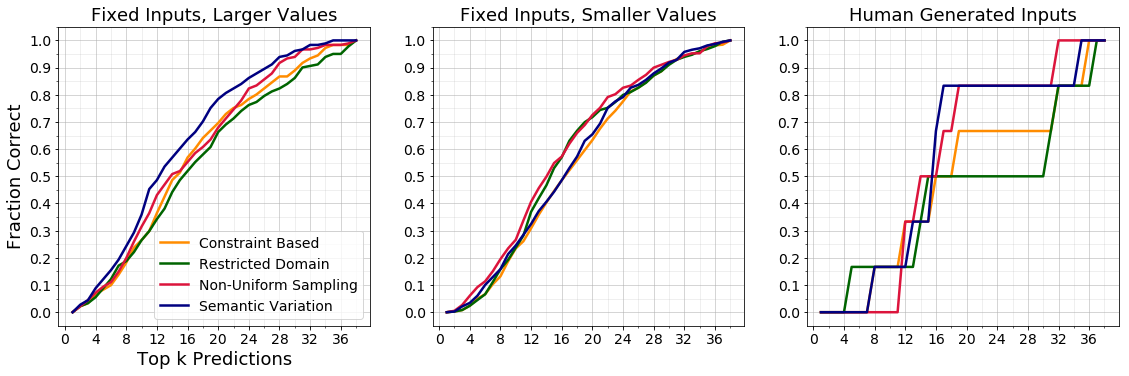

In [43]:
xaxis = np.arange(1,39)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(19,5.5))
axes[0].plot(xaxis,w_z3_z3, label = 'Constraint Based', color = 'darkorange', linewidth = 2.5)
# ax[0,0].plot(xaxis,f_ur_z3, label = 'Uniform Reduce', color = 'darkgreen',linewidth = 2.5)
axes[0].plot(xaxis,w_ur_z3, label = 'Restricted Domain', color = 'darkgreen',linewidth = 2.5)
axes[0].plot(xaxis,w_pb_z3, label = 'Non-Uniform Sampling', color = 'crimson',linewidth = 2.5)
axes[0].plot(xaxis,w_eu_z3, label = 'Semantic Variation', color = 'navy',linewidth = 2.5)
axes[0].set_title('Fixed Inputs, Larger Values',fontsize =18)
# axes[0,0].plot(xaxis,bw_z3,linewidth=2.5, color = 'tab:grey',
#         label = 'Baseline', linestyle='--')

axes[1].plot(xaxis,w_z3_z32, label = 'Constraint Based', color = 'darkorange', linewidth = 2.5)
# ax[0,0].plot(xaxis,f_ur_z3, label = 'Uniform Reduce', color = 'darkgreen',linewidth = 2.5)
axes[1].plot(xaxis,w_ur_z32, label = 'Restricted Domain', color = 'darkgreen',linewidth = 2.5)
axes[1].plot(xaxis,w_pb_z32, label = 'Non-Uniform Sampling', color = 'crimson',linewidth = 2.5)
axes[1].plot(xaxis,w_eu_z32, label = 'Semantic Variation', color = 'navy',linewidth = 2.5)
axes[1].set_title('Fixed Inputs, Smaller Values',fontsize =18)
# axes[0,1].plot(xaxis,bw_z32,linewidth=2.5, color = 'tab:grey',
#         label = 'Baseline', linestyle='--')

axes[2].plot(xaxis,w_z3_z33, label = 'Constraint Based', color = 'darkorange', linewidth = 2.5)
# ax[0,0].plot(xaxis,f_ur_z3, label = 'Uniform Reduce', color = 'darkgreen',linewidth = 2.5)
axes[2].plot(xaxis,w_ur_z33, label = 'Restricted Domain', color = 'darkgreen',linewidth = 2.5)
axes[2].plot(xaxis,w_pb_z33, label = 'Non-Uniform Sampling', color = 'crimson',linewidth = 2.5)
axes[2].plot(xaxis,w_eu_z33, label = 'Semantic Variation', color = 'navy',linewidth = 2.5)
axes[2].set_title('Human Generated Inputs',fontsize =18)
# axes[0,2].plot(xaxis,bw_z33,linewidth=2.5, color = 'tab:grey',
#         label = 'Baseline', linestyle='--')

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 39, 4)
minor_ticks = np.arange(0, 39, 2)

major_ticksy = np.arange(0, 1.1, 0.1)
minor_ticksy = np.arange(0, 1.1, 0.05)


axes[0].set_xticks(major_ticks)
axes[0].set_xticks(minor_ticks, minor=True)
axes[0].set_yticks(major_ticksy)
axes[0].set_yticks(minor_ticksy, minor=True)
axes[0].xaxis.set_tick_params(labelsize=14)
axes[0].yaxis.set_tick_params(labelsize=14)

axes[1].set_xticks(major_ticks)
axes[1].set_xticks(minor_ticks, minor=True)
axes[1].set_yticks(major_ticksy)
axes[1].set_yticks(minor_ticksy, minor=True)
axes[1].xaxis.set_tick_params(labelsize=14)
axes[1].yaxis.set_tick_params(labelsize=14)

axes[2].set_xticks(major_ticks)
axes[2].set_xticks(minor_ticks, minor=True)
axes[2].set_yticks(major_ticksy)
axes[2].set_yticks(minor_ticksy, minor=True)
axes[2].xaxis.set_tick_params(labelsize=14)
axes[2].yaxis.set_tick_params(labelsize=14)

axes[0].legend(fontsize = 14)

# ax.set_title('Combined Test Set Perfomance (1st Line)', fontsize = 18)
# ax.set_xlabel('Top k Predictions', fontsize = 13)
# ax.set_ylabel('Fraction Correct',fontsize = 13)
axes[0].grid(which='minor', alpha=0.25)
axes[0].grid(which='major', alpha=0.5)
# ax2.set_title('Combined Test Set Perfomance (Last Line)', fontsize = 18)
# ax2.set_xlabel('Top k Predictions', fontsize = 13)
# ax2.set_ylabel('Fraction Correct',fontsize = 13)
axes[1].grid(which='minor', alpha=0.25)
axes[1].grid(which='major', alpha=0.5)
axes[2].grid(which='minor', alpha=0.25)
axes[2].grid(which='major', alpha=0.5)

# ax3.set_title('Combined Test Set Perfomance (Whole Prog)', fontsize = 18)
axes[0].set_xlabel('Top k Predictions', fontsize = 18)
axes[0].set_ylabel('Fraction Correct',fontsize = 18)
# axes[1,1].grid(which='minor', alpha=0.25)
# axes[1,1].grid(which='major', alpha=0.5)
plt.savefig('Paper/figures/adversarial_test_sets_edit.png', bbox_inches='tight',dpi=300)
plt.show()